## Flight Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/Master/DS

/content/drive/MyDrive/Master/DS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

## Importing Dataset


In [ ]:
file_list = [
    'refined_dataset.csv'
]

data_frames = pd.DataFrame()

# Read each CSV file and append its DataFrame to the list
for file in file_list:
    file_path = 'https://raw.githubusercontent.com/AlexandraPavel/PriceFlightEstimator/master/'+file
    df = pd.read_csv(file_path, skipinitialspace=True)
    data_frames = pd.concat([data_frames, df], ignore_index=True)


In [ ]:
train_data = data_frames.iloc[:, 1:]

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
train_data.head()

,date_of_enquiry,departure,destination,flight_date,flight_time,arrival_time,airline,layovers,flight_duration,price
0,02/12/2023,Bucuresti,Istanbul,20/12/2023,11:35,14:00,AF,0,85,106
1,02/12/2023,Bucuresti,Istanbul,20/12/2023,10:15,12:45,PC,0,90,212
2,02/12/2023,Bucuresti,Istanbul,20/12/2023,15:25,17:55,RO,0,90,325
3,02/12/2023,Bucuresti,Istanbul,21/12/2023,17:25,19:50,AF,0,85,106
4,02/12/2023,Bucuresti,Istanbul,21/12/2023,15:50,18:40,PC,0,110,182


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_of_enquiry  71449 non-null  object
 1   departure        71449 non-null  object
 2   destination      71449 non-null  object
 3   flight_date      71449 non-null  object
 4   flight_time      71449 non-null  object
 5   arrival_time     71449 non-null  object
 6   airline          71449 non-null  object
 7   layovers         71449 non-null  int64 
 8   flight_duration  71449 non-null  int64 
 9   price            71449 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.5+ MB


In [ ]:
train_data["flight_duration"].value_counts()

185     854
140     782
120     704
200     591
95      577
       ... 
2350      1
2145      1
2110      1
2995      1
2225      1
Name: flight_duration, Length: 461, dtype: int64

In [ ]:
train_data["flight_duration"].head()

0     85
1     90
2     90
3     85
4    110
Name: flight_duration, dtype: int64

In [ ]:
train_data.shape

(71449, 10)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_of_enquiry  71449 non-null  object
 1   departure        71449 non-null  object
 2   destination      71449 non-null  object
 3   flight_date      71449 non-null  object
 4   flight_time      71449 non-null  object
 5   arrival_time     71449 non-null  object
 6   airline          71449 non-null  object
 7   layovers         71449 non-null  int64 
 8   flight_duration  71449 non-null  int64 
 9   price            71449 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.5+ MB


In [ ]:
train_data.isnull().sum()

date_of_enquiry    0
departure          0
destination        0
flight_date        0
flight_time        0
arrival_time       0
airline            0
layovers           0
flight_duration    0
price              0
dtype: int64

## Exploratory Data Analysis

In [ ]:
train_data["Flight_day"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.day
train_data["Flight_month"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.month
train_data["Flight_year"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.year
# 2023-12-30

In [ ]:
train_data["Enquiry_day"] =pd.to_datetime(train_data["date_of_enquiry"],format="%d/%m/%Y").dt.day
train_data["Enquiry_month"] =pd.to_datetime(train_data["date_of_enquiry"],format="%d/%m/%Y").dt.month

enquiry_days_before = []
enquiry_day = list(train_data["Enquiry_day"])
enquiry_month = list(train_data["Enquiry_month"])
flight_day = list(train_data["Flight_day"])
flight_month = list(train_data["Flight_month"])

for i in range(len(enquiry_day)):
    no_days = 0
    if enquiry_month[i] == flight_month[i]:
        no_days = flight_day[i] - enquiry_day[i]
    else:
        no_days = 31 - enquiry_day[i] + flight_day[i]

    enquiry_days_before.append(no_days)

train_data["Enquiry_days_before"] = enquiry_days_before

In [ ]:
train_data.sample(5)

,date_of_enquiry,departure,destination,flight_date,flight_time,arrival_time,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_day,Enquiry_month,Enquiry_days_before
64325,25/12/2023,Paris,Bucuresti,03/01/2024,16:10,01:15,RO,1,485,140,3,1,2024,25,12,9
47918,19/12/2023,Atena,Bucuresti,27/12/2023,16:25,01:15,TK,1,530,155,27,12,2023,19,12,8
32287,13/12/2023,Dublin,Bucuresti,04/01/2024,09:20,21:45,H,1,625,72,4,1,2024,13,12,22
55580,22/12/2023,Iasi,Barcelona,26/12/2023,05:00,19:00,W,2,900,164,26,12,2023,22,12,4
44197,18/12/2023,Paris,Cluj,26/12/2023,16:25,00:45,AF,1,440,233,26,12,2023,18,12,8


In [ ]:
train_data.drop(["flight_date"], axis = 1, inplace = True)
train_data.drop(["date_of_enquiry"], axis = 1, inplace = True)
train_data.drop(["Enquiry_day"], axis = 1, inplace = True)
train_data.drop(["Enquiry_month"], axis = 1, inplace = True)

In [ ]:
#Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["flight_time"],format="%H:%M").dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["flight_time"],format="%H:%M").dt.minute

train_data.drop(["flight_time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,departure,destination,arrival_time,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min
0,Bucuresti,Istanbul,14:00,AF,0,85,106,20,12,2023,18,11,35
1,Bucuresti,Istanbul,12:45,PC,0,90,212,20,12,2023,18,10,15
2,Bucuresti,Istanbul,17:55,RO,0,90,325,20,12,2023,18,15,25
3,Bucuresti,Istanbul,19:50,AF,0,85,106,21,12,2023,19,17,25
4,Bucuresti,Istanbul,18:40,PC,0,110,182,21,12,2023,19,15,50


In [ ]:
#Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["arrival_time"],format="%H:%M").dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["arrival_time"],format="%H:%M").dt.minute

train_data.drop(["arrival_time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40


# Handling Categorical Data


In [ ]:
train_data["airline"].value_counts()

AF    24112
W     13505
FR     7615
LH     4528
RO     4150
U      2221
TK     1844
LO     1793
H      1662
OS     1539
VY     1397
A      1065
KL      824
LX      775
JU      738
PC      426
AZ      383
UX      361
DY      290
EN      258
EI      255
SK      242
RK      217
XZ      207
IB      173
TP      135
EW      107
D        92
I        76
TO       65
LS       58
HV       54
RP       45
BT       42
BA       37
BZ       34
FH       19
XQ       19
V        17
GQ       15
SN       11
FB       10
WF        8
F         8
KM        5
OA        4
ET        2
L         2
GF        1
CY        1
ZB        1
XC        1
Name: airline, dtype: int64

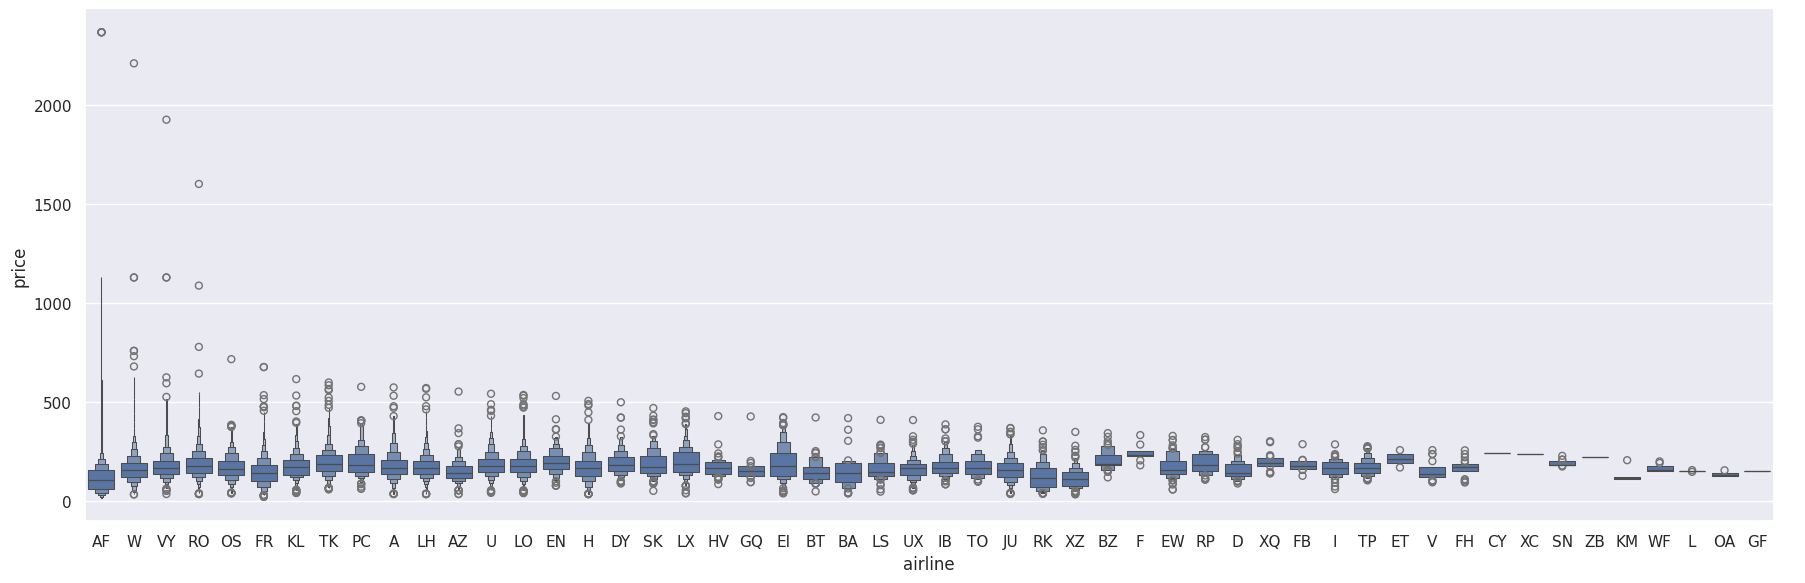

In [ ]:
# Airline vs price
sns.catplot(y= "price", x = "airline", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:

Airline = train_data[["airline"]]
Airline = pd.get_dummies(Airline)

Airline.head()

,airline_A,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["departure"].value_counts()

Bucuresti     11876
Cluj          10980
Iasi           9718
Oslo           1944
Zurich         1944
Atena          1944
Manchester     1944
Viena          1944
Dublin         1944
Lisabona       1944
Roma           1944
Munich         1944
Barcelona      1944
Frankfurt      1944
Madrid         1944
Amsterdam      1944
Paris          1944
Londra         1944
Istanbul       1944
Bruxelles      1944
Milano         1943
Berlin         1943
Copenhaga      1941
Name: departure, dtype: int64

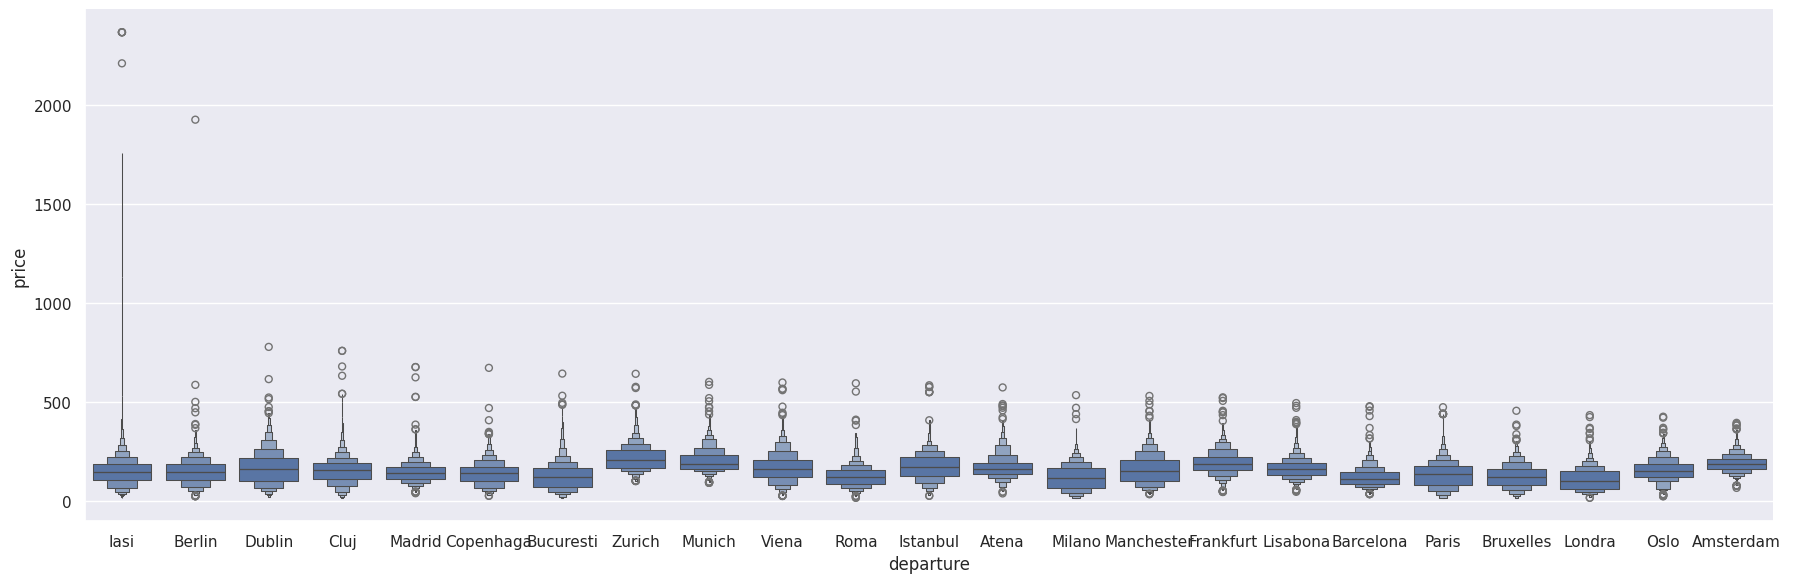

In [ ]:
# Compare Source and Price
sns.catplot(y = "price", x= "departure", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [ ]:
Source =train_data[["departure"]]

Source =pd.get_dummies(Source)

Source.head()

,departure_Amsterdam,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["destination"].value_counts()

Bucuresti     13980
Cluj          13079
Iasi          11816
Londra         1629
Bruxelles      1629
Berlin         1629
Milano         1629
Zurich         1629
Atena          1629
Manchester     1629
Istanbul       1629
Dublin         1629
Lisabona       1629
Roma           1629
Munich         1629
Barcelona      1629
Frankfurt      1629
Madrid         1629
Amsterdam      1629
Paris          1629
Viena          1628
Oslo           1627
Copenhaga      1626
Name: destination, dtype: int64

In [ ]:
Destination =train_data[["destination"]]

Destination =pd.get_dummies(Destination)

Destination.head()

,destination_Amsterdam,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["layovers"].value_counts()

1    51927
0    13030
2     6477
3       15
Name: layovers, dtype: int64

In [ ]:
train_data.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40


In [ ]:
data_train =pd.concat([train_data,Airline,Source,Destination], axis=1)

In [ ]:
data_train.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_A,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Amsterdam,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Amsterdam,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.drop(["airline","departure", "destination"], axis=1, inplace=True)

In [ ]:
data_train.head()

,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_A,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Amsterdam,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Amsterdam,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,0,85,106,20,12,2023,18,11,35,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,90,212,20,12,2023,18,10,15,12,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,90,325,20,12,2023,18,15,25,17,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,85,106,21,12,2023,19,17,25,19,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,110,182,21,12,2023,19,15,50,18,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.shape

(71449, 109)

# Test Set

In [ ]:
X = data_train.loc[:, data_train.columns]
X.drop(["price"], axis = 1, inplace = True)
y = data_train['price']

val_X = X.values.astype(float)
val_y = y.values.astype(float)



## Feature Selection


In [ ]:
X_train, X_test_2, y_train, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state=1234)
test_data = pd.concat([pd.DataFrame(X_test_2), pd.DataFrame(pd.DataFrame(y_test_2), columns=['price'])], axis=1)
X, y = X_train, y_train

In [ ]:
data_train.shape

(71449, 109)

In [ ]:
data_train.columns

Index(['layovers', 'flight_duration', 'price', 'Flight_day', 'Flight_month',
       'Flight_year', 'Enquiry_days_before', 'Dep_hour', 'Dep_min',
       'Arrival_hour',
       ...
       'destination_Londra', 'destination_Madrid', 'destination_Manchester',
       'destination_Milano', 'destination_Munich', 'destination_Oslo',
       'destination_Paris', 'destination_Roma', 'destination_Viena',
       'destination_Zurich'],
      dtype='object', length=109)

In [ ]:

X.head()

,layovers,flight_duration,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_A,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Amsterdam,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Amsterdam,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
58000,0,150,28,12,2023,5,10,40,12,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68458,1,580,5,1,2024,9,6,30,17,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2511,1,1110,28,12,2023,26,19,50,15,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26407,1,1060,28,12,2023,17,5,35,22,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1814,1,370,30,12,2023,28,7,5,14,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

y.head()

58000     16
68458     98
2511      97
26407    135
1814     172
Name: price, dtype: int64

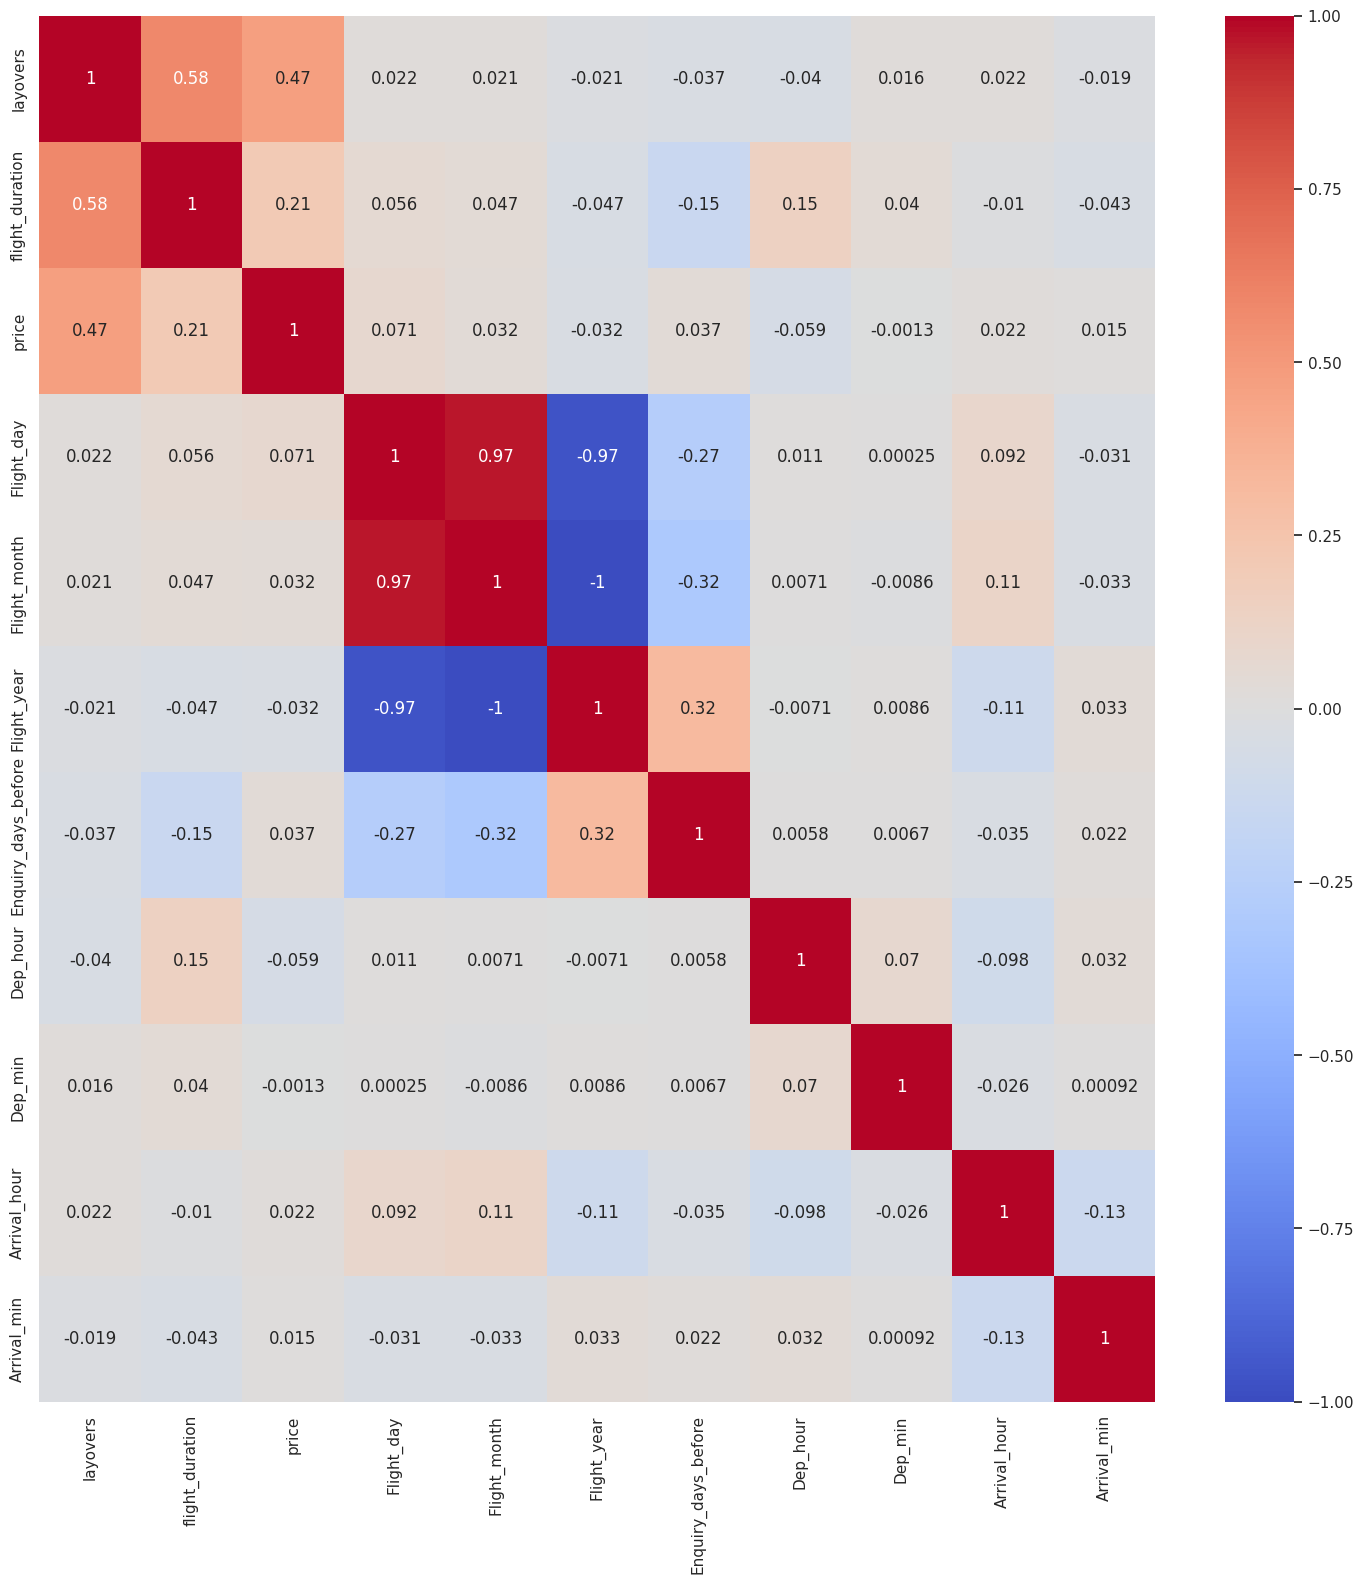

In [ ]:
plt.figure(figsize = (18,18))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm")

plt.show()

#Another model data

In [ ]:
val_y.max()

2369.0

In [ ]:
val_y.min()

14.0

In [ ]:
val_X.mean(axis=0)

array([9.08704111e-01, 7.15051701e+02, 2.07884505e+01, 9.21663004e+00,
       2.02325303e+03, 1.41187840e+01, 1.25656062e+01, 2.64181444e+01,
       1.35805959e+01, 2.81308206e+01, 1.49057370e-02, 3.37471483e-01,
       5.36046691e-03, 5.17851894e-04, 5.87831880e-04, 4.75863903e-04,
       1.39959971e-05, 1.28763174e-03, 4.05883917e-03, 3.56897927e-03,
       3.61096726e-03, 2.79919943e-05, 1.49757169e-03, 1.11967977e-04,
       1.39959971e-04, 2.65923946e-04, 1.06579518e-01, 1.39959971e-05,
       2.09939957e-04, 2.32613473e-02, 7.55783846e-04, 1.06369578e-03,
       2.42130751e-03, 1.03290459e-02, 1.15327016e-02, 6.99799857e-05,
       2.79919943e-05, 6.33738751e-02, 2.50948229e-02, 8.11767834e-04,
       1.08468978e-02, 5.59839886e-05, 2.15398396e-02, 5.96229478e-03,
       3.03713138e-03, 5.80833882e-02, 6.29819872e-04, 3.38703131e-03,
       1.53955969e-04, 2.58086187e-02, 9.09739814e-04, 1.88945961e-03,
       3.10851097e-02, 5.05255497e-03, 2.37931951e-04, 1.95524080e-02,
      

In [ ]:
val_X_n = (val_X - val_X.mean(axis=0)) / val_X.std(axis=0)
val_X_nb = np.concatenate((val_X_n, np.ones(shape=(val_X_n.shape[0], 1))), axis=-1)
val_y_n = (val_y - val_y.min()) / (val_y.max() - val_y.min())

In [ ]:
X_train, X_test_2, y_train, y_test_2 = train_test_split(val_X_nb, val_y_n, test_size = 0.2, random_state=1234)
X, y = X_train, y_train

## Fitting model using MLP

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test_2.shape, y_test_2.shape)

(45727, 109) (45727,)
(11432, 109) (11432,)
(14290, 109) (14290,)


In [ ]:
# from torch.nn import Sequential, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14080     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 178945 (699.00 KB)
Trainable params: 178945 (699.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
1139/1144 [============================>.] - ETA: 0s - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 1: val_loss improved from inf to 0.01394, saving model to Weights-001--0.01394.hdf5
1144/1144 [==============================] - 12s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139
Epoch 2/500
1137/1144 [============================>.] - ETA: 0s - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 2: val_loss improved from 0.01394 to 0.01286, saving model to Weights-002--0.01286.hdf5
1144/1144 [==============================] - 7s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129
Epoch 3/500
1141/1144 [============================>.] - ETA: 0s - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 3: val_loss improved from 0.01286 to 0.01189, saving model to Weights-003--0.01189.hdf5
1144/1144 [==============================] - 13s 11ms/step - loss: 0.0118 - mean_

In [ ]:
%ls

output/


In [ ]:
wights_file = 'output/Weights-419--0.00836.hdf5' # choose the best checkpoint
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
y_pred = NN_model.predict(X_test)

358/358 [==============================] - 1s 1ms/step


In [ ]:
prediction = NN_model.predict(X_test_2)

447/447 [==============================] - 1s 1ms/step


In [ ]:
from sklearn import metrics

metrics.r2_score(y_test_2, prediction)

0.661013874115264

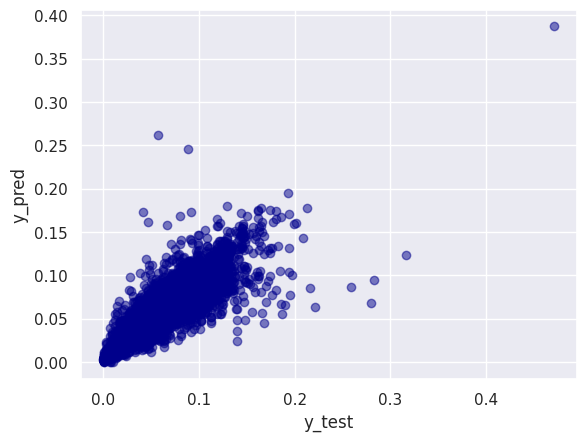

In [ ]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.008157062702103356
MSE: 0.00019049330650298745
RMSE: 0.013801931259899371


In [ ]:
metrics.r2_score(y_test, y_pred)

0.784419792947605

## Hyperparameter Tuning

In [ ]:
%pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import kerastuner as kt
import keras

<ipython-input-54-f58d023a290b>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):
    dnn_layers_ss = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15, 16, 17, 18, 19, 20]
    dnn_units_min, dnn_units_max = 32, 512
    dropout_ss = [0.05, 0.1, 0.15, 0.2, 0.25]
    active_func_ss = ['relu', 'tanh']
    optimizer_ss = ['adam', 'SGD']
    lr_min, lr_max = 1e-4, 1e-1

    active_func = hp.Choice('activation', active_func_ss)
    optimizer = hp.Choice('optimizer', optimizer_ss)
    lr = hp.Float('learning_rate', min_value=lr_min, max_value=lr_max, sampling='log')

    inputs = tf.keras.Input(shape=(X_train.shape[1]))
    print("inputs", inputs.shape)
    flatten_layer = tf.keras.layers.Flatten()(inputs)

    # create hidden layers
    dnn_units = hp.Int(f"0_units", min_value=dnn_units_min, max_value=dnn_units_max)
    dense = tf.keras.layers.Dense(units=dnn_units, activation=active_func)(flatten_layer)
    for layer_i in range(hp.Choice("n_layers", dnn_layers_ss) - 1):
        dnn_units = hp.Int(f"{layer_i}_units", min_value=dnn_units_min, max_value=dnn_units_max)
        dense = tf.keras.layers.Dense(units=dnn_units, activation=active_func)(dense)
        if hp.Boolean("dropout"):
            print("Applying dropout")
            dropout_rate = hp.Choice("dropout_rate", values=dropout_ss)
            dense = tf.keras.layers.Dropout(rate=dropout_rate)(dense)
    outputs = tf.keras.layers.Dense(units=1)(dense)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        raise("Not supported optimizer")

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse'])
    return model

In [ ]:

def build_tuner(model, hpo_method, objective, dir_name):
    if hpo_method == "RandomSearch":
        tuner = kt.RandomSearch(model, objective=objective, max_trials=3, executions_per_trial=1,
                               project_name=hpo_method, directory=dir_name)
    elif hpo_method == "Hyperband":
        tuner = kt.Hyperband(model, objective='val_mse', max_epochs=10, executions_per_trial=2, seed=42,
                            project_name=hpo_method)
    elif hpo_method == "BayesianOptimization":
        tuner = kt.BayesianOptimization(model, objective='val_mse', max_trials=10, executions_per_trial=2, seed=42,
                                       project_name=hpo_method)
    return tuner

obj = kt.Objective('val_mse', direction='min')
dir_name = "v2"
tuner = build_tuner(build_model, "BayesianOptimization", obj, dir_name)

inputs (None, 109)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'SGD'], 'ordered': False}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 1, 'sampling': 'linear'}
n_layers (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'ordered': True}
dropout (Boolean)
{'default': False, 'conditions': []}
1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 1, 'sampling': 'linear'}


In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 04m 01s]
val_mse: 0.0008815563633106649

Best val_mse So Far: 0.00021978463337291032
Total elapsed time: 00h 30m 36s


In [ ]:
print("Best params", tuner.get_best_hyperparameters()[0].get_config())

Best params {'space': [{'class_name': 'Choice', 'config': {'name': 'activation', 'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'SGD'], 'ordered': False}}, {'class_name': 'Float', 'config': {'name': 'learning_rate', 'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}}, {'class_name': 'Int', 'config': {'name': '0_units', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'n_layers', 'default': 3, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'ordered': True}}, {'class_name': 'Boolean', 'config': {'name': 'dropout', 'default': False, 'conditions': []}}, {'class_name': 'Int', 'config': {'name': '1_units', 'default': None, 'conditions': [], 

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
h_model = tuner.hypermodel.build(best_hps)
h_model.summary()
h_model.fit(X_train, y_train, epochs=200, validation_split=0.2)

inputs (None, 109)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 109)]             0         
                                                                 
 flatten_4 (Flatten)         (None, 109)               0         
                                                                 
 dense_52 (Dense)            (None, 445)               48950     
                                                                 
 dense_53 (Dense)            (None, 445)               198470    
                                                                 
 dense_54 (Dense)            (None, 416)               185536    
                                                                 
 dense_55 (Dense)            (None, 423)               176391    
                                                                 
 dense_56 (Dense)            (None, 101)

In [ ]:
y_pred = h_model.predict(X_test)

358/358 [==============================] - 1s 2ms/step


In [ ]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.7888877842746689

In [ ]:
prediction = h_model.predict(X_test_2)

447/447 [==============================] - 1s 2ms/step


In [ ]:
metrics.r2_score(y_test_2, prediction)

0.662115970948167

In [ ]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.008246749969933935
MSE: 0.00018654525184177165
RMSE: 0.013658156970901003


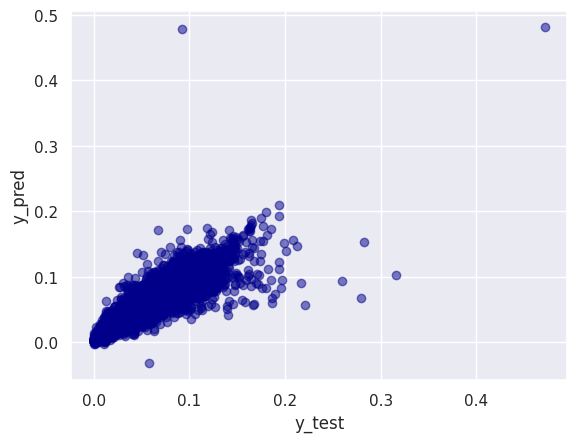

In [ ]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Save the 2nd model to reuse it again

In [ ]:
%ls output/

model_1.pkl  model_3.pkl  model_5.pkl  model_7.pkl    model_9.keras
model_2.pkl  model_4.pkl  model_6.pkl  model_8.keras  Weights-419--0.00836.hdf5


In [ ]:
h_model.save('./output/model_11.keras')

In [ ]:
model = keras.models.load_model('./output/model_11.keras')

In [ ]:
y_prediction = model.predict(X_test_2)

447/447 [==============================] - 1s 2ms/step


In [ ]:
metrics.r2_score(y_test_2, y_prediction)

0.617859976805493

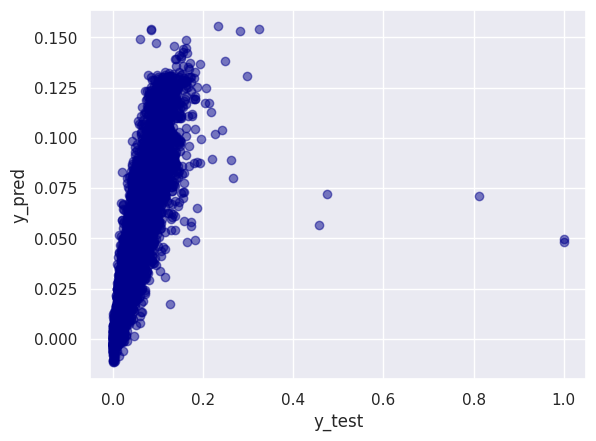

In [ ]:
plt.scatter(y_test_2, y_prediction, alpha =0.5, color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()